In [1]:
import pandas as pd #데이터프레임을 활용하기 위해 판다스 임포트
import numpy as np #어레이 연산을 효율적으로 하기 위해
import matplotlib.pyplot as plt #데이터 시각화를 하기 위해
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier # 랜던포레스트를 학습모델로 설정

In [2]:
train_data = pd.read_csv("https://raw.githubusercontent.com/developer-sdk/kaggle-python-beginner/master/datas/kaggle-titanic/train.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/developer-sdk/kaggle-python-beginner/master/datas/kaggle-titanic/test.csv")

#데이터 전처리

In [3]:
trd = train_data #입력상 편의를 위해
ted = test_data

In [4]:
trd.head(10) #확인용

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
trd["fellow"] = trd["SibSp"] + trd["Parch"] #두 항의 구분이 애매하다고 판단하여 동승자로써 합해버림
trd.drop(columns = ["SibSp","Parch"], inplace=True)

ted["fellow"] = ted["SibSp"] + ted["Parch"] 
ted.drop(columns = ["SibSp","Parch"], inplace=True)

In [6]:
trd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   Embarked     889 non-null    object 
 10  fellow       891 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [7]:
trd.isnull().sum() #누락데이터 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
Ticket           0
Fare             0
Cabin          687
Embarked         2
fellow           0
dtype: int64

In [8]:
# Cabin 데이터는 누락값의 비율이 크기 때문에 가치가 없는 데이터라고 판단함
trd.drop(columns = ["Cabin"], inplace=True) #"Cabin"열을 제거
ted.drop(columns = ["Cabin"], inplace=True)

###age데이터 채우기 -> 이름 열에 있는 힌트들로 채워주기

In [9]:
# Status 컬럼생성
name_lst = []
for i in range(891):
  trd_sp = trd.loc[i,"Name"].split(" ")
  trd_st = trd_sp[1]
  name_lst.append(trd_st)
trd["Status"] = name_lst
trd.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,fellow,Status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0,Mr.
5,6,0,3,"Moran, Mr. James",male,NaN,330877,8.4583,Q,0,Mr.
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,17463,51.8625,S,0,Mr.
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,349909,21.0750,S,4,Master.
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,347742,11.1333,S,2,Mrs.
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,237736,30.0708,C,1,Mrs.


In [10]:
# 각 신분에 해당하는 인원수를 나타내기 위해 딕셔너리 생성
# 밑에서 계산을 쉽게 하기 위하여
status = {}
for n in range(891):
  if trd.loc[n,"Status"] in status.keys():
    status[trd.loc[n,"Status"]] += 1
  else:
    status[trd.loc[n,"Status"]] = 1
print(status)

{'Mr.': 502, 'Mrs.': 121, 'Miss.': 179, 'Master.': 40, 'Planke,': 3, 'Don.': 1, 'Rev.': 6, 'Billiard,': 1, 'der': 1, 'Walle,': 1, 'Dr.': 7, 'Pelsmaeker,': 1, 'Mulder,': 1, 'y': 4, 'Steen,': 1, 'Carlo,': 1, 'Mme.': 1, 'Impe,': 3, 'Ms.': 1, 'Major.': 2, 'Gordon,': 2, 'Messemaeker,': 1, 'Mlle.': 2, 'Col.': 2, 'Capt.': 1, 'Velde,': 1, 'the': 1, 'Shawah,': 1, 'Jonkheer.': 1, 'Melkebeke,': 1, 'Cruyssen,': 1}


In [11]:
# 각 키별로 None값을 평균값으로 채워줌
for i in status.keys():
  sum_age = 0
  count_notnull=0
  for n in range(891):
    if trd.loc[n,"Status"] == i and trd.loc[n,"Age"]!= np.NaN:
      sum_age += trd.loc[n,"Age"]
      count_notnull += 1

  mean_age = sum_age / count_notnull
  trd["Age"]=trd["Age"].fillna(mean_age)

In [12]:
trd.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,fellow,Status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,A/5 21171,7.2500,S,1,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,PC 17599,71.2833,C,1,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,STON/O2. 3101282,7.9250,S,0,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,113803,53.1000,S,1,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,373450,8.0500,S,0,Mr.
5,6,0,3,"Moran, Mr. James",male,21.666667,330877,8.4583,Q,0,Mr.
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,17463,51.8625,S,0,Mr.
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,349909,21.0750,S,4,Master.
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,347742,11.1333,S,2,Mrs.
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,237736,30.0708,C,1,Mrs.


###Age를 여러 구간으로 나누기

In [13]:
for i in range(891):
  if trd.loc[i,"Age"] <=6:
    trd.loc[i,"Age"] = "Child(0~6)"
  elif 6 < trd.loc[i,"Age"] <=18:
    trd.loc[i,"Age"] = "Student(6~18)"
  elif 18 < trd.loc[i,"Age"] <=60:
    trd.loc[i,"Age"] = "Adult(18~60)"
  elif 60 < trd.loc[i,"Age"]:
    trd.loc[i,"Age"] = "Aged(60~)"
trd.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,fellow,Status
0,1,0,3,"Braund, Mr. Owen Harris",male,Adult(18~60),A/5 21171,7.2500,S,1,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Adult(18~60),PC 17599,71.2833,C,1,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,Adult(18~60),STON/O2. 3101282,7.9250,S,0,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Adult(18~60),113803,53.1000,S,1,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,Adult(18~60),373450,8.0500,S,0,Mr.


###embarked 데이터 채우기 -> 가장 많은 승객이 탑승했던 장소로 대입

In [14]:
# "Embarked"열에서 최빈값을 객체로 지정
most_emb = trd["Embarked"].value_counts(dropna=True).idxmax()

In [15]:
# 최빈값으로 None값 채우기
trd["Embarked"].fillna(most_emb, inplace=True)

In [16]:
trd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    object 
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
 9   fellow       891 non-null    int64  
 10  Status       891 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 76.7+ KB


#데이터 시각화

##Pclass 별 생존 확률

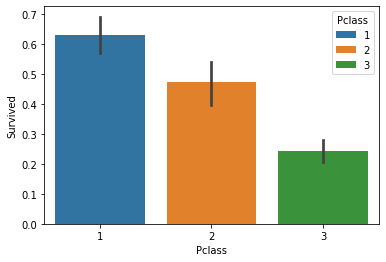

In [17]:
sns.barplot(x=trd["Pclass"], y=trd["Survived"], hue=trd["Pclass"], dodge=False)

##Sex 별 생존 확률

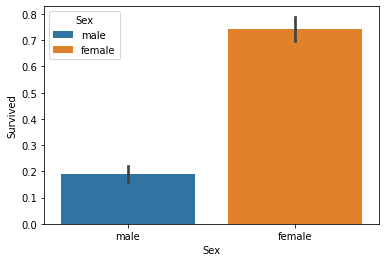

In [18]:
sns.barplot(x=trd["Sex"], y=trd["Survived"], hue=trd["Sex"], dodge=False)
# barplot은 평균값을 표현하기 때문에 0,1로 나타내던 생존여부는 생존률을 의미한다.
# hue 매개변수 : 그룹별로 색을 구분
# dodge 매개변수 : True면 쌓아 올려서 하나의 막대로/ False면 분리해서 여러 막대로 표현

##Age 별 생존 확률

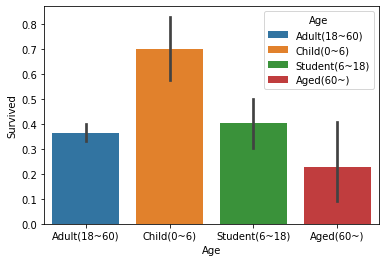

In [19]:
sns.barplot(x=trd["Age"], y=trd["Survived"], hue=trd["Age"], dodge=False)

##Embarked 별 생존 확률

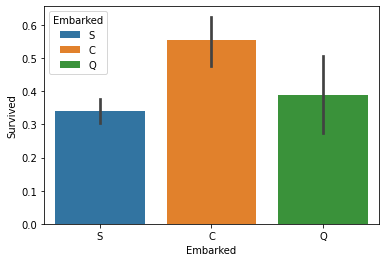

In [20]:
sns.barplot(x=trd["Embarked"], y=trd["Survived"], hue=trd["Embarked"], dodge=False)

##fellow 별 생존 확률

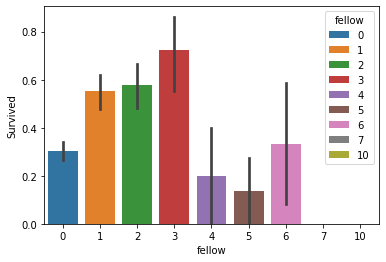

In [21]:
sns.barplot(x=trd["fellow"], y=trd["Survived"], hue=trd["fellow"], dodge=False)

#모델 학습 준비

In [22]:
trd.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,fellow,Status
0,1,0,3,"Braund, Mr. Owen Harris",male,Adult(18~60),A/5 21171,7.2500,S,1,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Adult(18~60),PC 17599,71.2833,C,1,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,Adult(18~60),STON/O2. 3101282,7.9250,S,0,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Adult(18~60),113803,53.1000,S,1,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,Adult(18~60),373450,8.0500,S,0,Mr.


In [23]:
# Survived 컬럼을 타깃으로 빼내어 준뒤, 데이터 프레임을 넘파이 배열로 변경
train_input = trd[["Pclass",	"Sex","Age","fellow",	"Embarked"]].to_numpy()
train_target = trd["Survived"].to_numpy()

test_input = ted[["Pclass",	"Sex","Age","fellow",	"Embarked"]].to_numpy()

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))

ValueError: ignored

In [ ]:
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score = True, n_jobs=-1)
print(np.mean(scores["train_score"]), np.mean(scores["test_score"]))